# Using DESeq

[Simon Anders, Wolfgang Huber: Differential expression analysis for sequence count data. Genome Biology 2010, 11:106.](http://dx.doi.org/10.1186/gb-2010-11-10-r106)

In [48]:
suppressPackageStartupMessages(library(tidyverse))

In [49]:
suppressPackageStartupMessages(library(DESeq2))

## Processing FastQ

In [50]:
data.dir <- "/Volumes/HD2/hts-course-stat/CURRENT/Data/studentcounts2015"

In [51]:
fs <- list.files(path = data.dir, pattern = '*.csv')

In [52]:
df <- data.frame(files=fs, stringsAsFactors=F)

In [53]:
head(df, 3)

files
7A_E.csv
7A_G.csv
7A_K.csv


In [54]:
df <- df %>% transmute(sample=substr(files, 1, 4), files) %>%
mutate(treatment=as.factor(substr(sample, 1, 1)), 
       repl=as.factor(substr(sample, 2, 2)),
       team=as.factor(substr(sample, 4,4)))

In [55]:
head(df, 3)

sample,files,treatment,repl,team
7A_E,7A_E.csv,7,A,E
7A_G,7A_G.csv,7,A,G
7A_K,7A_K.csv,7,A,K


In [56]:
htseq <- DESeqDataSetFromHTSeqCount(directory = data.dir, 
                                    sampleTable = df, 
                                    design=~ treatment)

In [57]:
htseq

class: DESeqDataSet 
dim: 4444 30 
metadata(1): version
assays(1): counts
rownames(4444): gene0 gene1 ... gene998 gene999
rowData names(0):
colnames(30): 7A_E 7A_G ... 8C_N 8C_P
colData names(3): treatment repl team

### Data 

4444 genes and 30 samples

In [58]:
dim(counts(htseq))

[1] 4444   30

In [59]:
head(counts(htseq), 3)

,7A_E,7A_G,7A_K,7A_N,7A_P,7B_E,7B_G,7B_K,7B_N,7B_P,⋯,8B_E,8B_G,8B_K,8B_N,8B_P,8C_E,8C_G,8C_K,8C_N,8C_P
gene0,9,17,11,17,11,12,22,20,6,9,⋯,8,29,17,12,28,10,22,15,7,25
gene1,108,170,97,88,173,119,241,103,51,162,⋯,164,215,171,99,238,196,98,153,121,247
gene10,3,0,7,3,3,2,1,1,2,2,⋯,3,0,3,1,1,7,3,2,3,1


In [60]:
de <- DESeq(htseq)

estimating size factors
estimating dispersions
gene-wise dispersion estimates
mean-dispersion relationship
final dispersion estimates
fitting model and testing
-- replacing outliers and refitting for 46 genes
-- DESeq argument 'minReplicatesForReplace' = 7 
-- original counts are preserved in counts(dds)
estimating dispersions
fitting model and testing


### Normalized counts

In [62]:
head(counts(de, normalize=T), 3)

,7A_E,7A_G,7A_K,7A_N,7A_P,7B_E,7B_G,7B_K,7B_N,7B_P,⋯,8B_E,8B_G,8B_K,8B_N,8B_P,8C_E,8C_G,8C_K,8C_N,8C_P
gene0,8.987548,14.98392,10.476357,18.231760,10.270378,11.408986,15.8224808,18.3164294,13.377277,7.566147,⋯,5.672115,25.80545,13.54928,19.36032,29.146080,6.456431,19.43201,14.430438,9.810017,25.07025
gene1,107.850571,149.83919,92.382420,94.376167,161.525030,113.139110,173.3280851,94.3296112,113.706858,136.190642,⋯,116.278353,191.31629,136.28986,159.72261,247.741682,126.546050,86.56078,147.190472,169.573151,247.69411
gene10,2.995849,0.00000,6.666773,3.217369,2.801012,1.901498,0.7192037,0.9158215,4.459092,1.681366,⋯,2.127043,0.00000,2.39105,1.61336,1.040931,4.519502,2.64982,1.924058,4.204293,1.00281


### Mean-dispersion plot

Warning message:
“Removed 58 rows containing missing values (geom_point).”

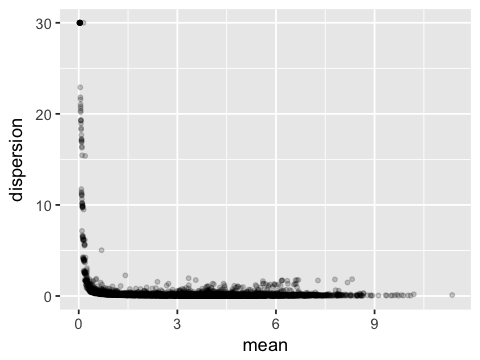

In [61]:
ggplot(data.frame(mean=log1p(apply(counts(de, normalize=T), 1, mean)), 
                  dispersion=dispersions(de)),
       aes(x=mean, y=dispersion)) +
geom_point(size=1, alpha=0.2)

## Analysis of individual teams

In [81]:
de.E <- de[, de@colData$team == 'E']

In [82]:
de.E

class: DESeqDataSet 
dim: 4444 6 
metadata(1): version
assays(5): counts mu cooks replaceCounts replaceCooks
rownames(4444): gene0 gene1 ... gene998 gene999
rowData names(22): baseMean baseVar ... maxCooks replace
colnames(6): 7A_E 7B_E ... 8B_E 8C_E
colData names(5): treatment repl team sizeFactor replaceable

In [83]:
dim(counts(de.E))

[1] 4444    6

In [84]:
head(counts(de.E), 3)

,7A_E,7B_E,7C_E,8A_E,8B_E,8C_E
gene0,9,12,19,21,8,10
gene1,108,119,155,193,164,196
gene10,3,2,2,6,3,7


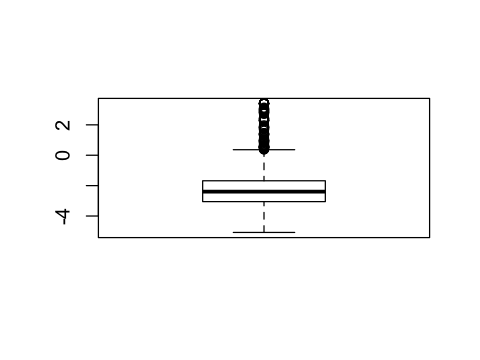

In [115]:
boxplot(log(dispersions(de.E))) 

In [140]:
res <- results(de.E)

In [141]:
res[1:4,]

log2 fold change (MLE): treatment 8 vs 7 
Wald test p-value: treatment 8 vs 7 
DataFrame with 4 rows and 6 columns
          baseMean log2FoldChange     lfcSE       stat       pvalue        padj
         <numeric>      <numeric> <numeric>  <numeric>    <numeric>   <numeric>
gene0    15.274431      0.2993059 0.2244440  1.3335435 0.1823535183 0.335028826
gene1   145.603062      0.4360634 0.1308688  3.3320662 0.0008620376 0.004175252
gene10    2.605083     -0.3214136 0.4133084 -0.7776604 0.4367692261 0.615109509
gene100  20.323396      0.0880341 0.1514543  0.5812586 0.5610661707 0.724668348

In [144]:
data.frame(colums = mcols(res)$description)

colums
mean of normalized counts for all samples
log2 fold change (MLE): treatment 8 vs 7
standard error: treatment 8 vs 7
Wald statistic: treatment 8 vs 7
Wald test p-value: treatment 8 vs 7
BH adjusted p-values


In [145]:
res <- as.data.frame(res) %>% mutate(BH = p.adjust(pvalue, 'BH'))

In [146]:
head(res, 3)

baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,BH
15.274431,0.2993059,0.2244440,1.3335435,0.1823535183,0.335028826,0.341649949
145.603062,0.4360634,0.1308688,3.3320662,0.0008620376,0.004175252,0.004257767
2.605083,-0.3214136,0.4133084,-0.7776604,0.4367692261,0.615109509,0.627265824


In [149]:
res %>% arrange(pvalue) %>% head(3)

baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,BH
163.46111,-2.034680,0.1887792,-10.77809,4.368460e-27,1.878875e-23,1.916007e-23
40.50071,2.712166,0.2534469,10.70112,1.005540e-26,2.162413e-23,2.205149e-23
90.42765,3.387681,0.3223246,10.51016,7.756518e-26,1.112026e-22,1.134003e-22


In [177]:
res <- res %>% mutate(hits=(padj < 0.05) & (abs(log2FoldChange) > 2))
head(res, 3)

baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,BH,hits
15.274431,0.2993059,0.2244440,1.3335435,0.1823535183,0.335028826,0.341649949,FALSE
145.603062,0.4360634,0.1308688,3.3320662,0.0008620376,0.004175252,0.004257767,FALSE
2.605083,-0.3214136,0.4133084,-0.7776604,0.4367692261,0.615109509,0.627265824,FALSE


Warning message:
“Removed 143 rows containing missing values (geom_point).”

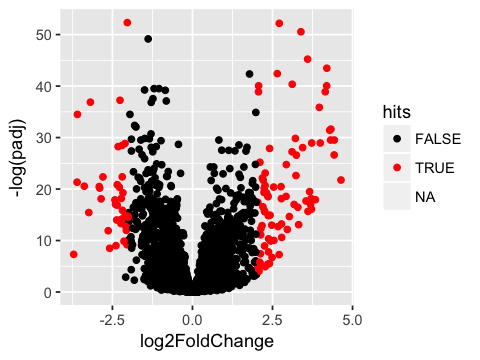

In [184]:
ggplot(res, aes(x=log2FoldChange, y=-log(padj), color=hits)) +
geom_point() +
scale_colour_manual(values = c("black", "red"))

### FPM: fragments per million mapped fragments

In [185]:
head(fpm(de.E), 3)

,7A_E,7B_E,7C_E,8A_E,8B_E,8C_E
gene0,6.153663,7.811592,10.787843,10.803960,3.883627,4.420639
gene1,73.843954,77.464951,88.006090,99.293534,79.614352,86.644518
gene10,2.051221,1.301932,1.135562,3.086846,1.456360,3.094447


### FPKM: fragments per kilobase per million mapped fragments

In [187]:
# Need annotation of gene length

## Regularized log transform

In [200]:
rld <- rlog(de.E, blind = T)

In [201]:
rld

class: DESeqTransform 
dim: 4444 6 
metadata(1): version
assays(1): ''
rownames(4444): gene0 gene1 ... gene998 gene999
rowData names(23): baseMean baseVar ... dispFit rlogIntercept
colnames(6): 7A_E 7B_E ... 8B_E 8C_E
colData names(5): treatment repl team sizeFactor replaceable

In [202]:
head(assay(rld))

,7A_E,7B_E,7C_E,8A_E,8B_E,8C_E
gene0,3.286976,3.416716,3.622487,3.626383,3.063574,3.116328
gene1,6.838159,6.874599,6.974391,7.071443,6.895511,6.962116
gene10,1.550284,1.433806,1.400066,1.704624,1.451038,1.711100
gene100,4.420682,3.928262,4.295481,4.283255,4.363556,4.383583
gene1000,2.884798,2.800880,2.612119,2.372327,2.279139,2.377640
gene1001,1.284654,1.488203,1.448676,1.584320,1.486914,1.600126


In [203]:
d <- dist(t(assay(rld)))

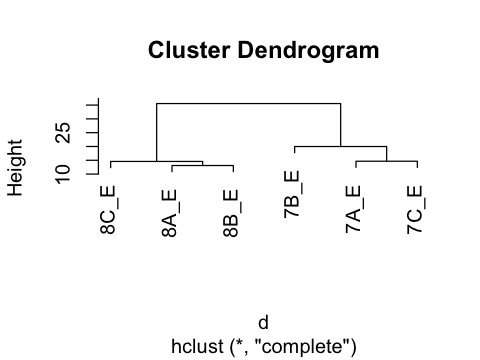

In [204]:
plot(hclust(d))

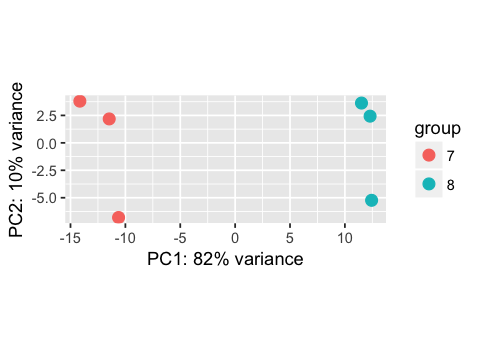

In [206]:
plotPCA(rld, intgroup='treatment')